In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Carregar o dataset
dolar_data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/Bases/dolar.csv')
dolar_data['Date'] = pd.to_datetime(dolar_data['Date'])
dolar_data.set_index('Date', inplace=True)
dolar_data['Price_Diff'] = dolar_data['Preco_Real'].diff()

# Removendo valores NaN
dolar_data.dropna(inplace=True)

# Dividir os dados em treino e teste
train_data = dolar_data['Price_Diff'].loc[dolar_data.index < '2022-01-01']
test_data = dolar_data['Price_Diff'].loc[dolar_data.index >= '2022-01-01']

# Seleção automática de parâmetros SARIMA
auto_model = auto_arima(train_data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Treinamento do modelo SARIMA com parâmetros selecionados
model = SARIMAX(train_data, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
model_fit = model.fit(disp=0)

# Previsões
forecast = model_fit.forecast(steps=len(test_data))

# Criação do DataFrame de Previsões
predictions_df = pd.DataFrame({
    'Date': test_data.index,
    'Actual': test_data.values,
    'Predicted': forecast
})

# Filtrando para o período desejado
desired_prediction_period = predictions_df[
    (predictions_df['Date'] >= pd.to_datetime('2023-07-01')) &
    (predictions_df['Date'] <= pd.to_datetime('2023-07-09'))
]

print(desired_prediction_period)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=27741.379, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=26558.846, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=27739.379, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=26556.866, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=26558.846, Time=0.34 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=26560.845, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=26139.989, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=26141.983, Time=0.72 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=26141.983, Time=0.67 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=26143.983, Time=0.60 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=25899.298, Time=0.25 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=25901.299, Time=0.67 sec
 ARIMA(3,1,0)(0,0

c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


           Date  Actual  Predicted
4131 2023-07-03   -1.11   -2.61645
4132 2023-07-04    0.22   -2.61645
4133 2023-07-05   -2.45   -2.61645
4134 2023-07-06    7.16   -2.61645
4135 2023-07-07   -0.22   -2.61645


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Test Statistic                   -1.234693
p-value                           0.658497
#Lags Used                       24.000000
Number of Observations Used    4191.000000
Critical Value (1%)              -3.431911
Critical Value (5%)              -2.862230
Critical Value (10%)             -2.567137
dtype: float64
Número recomendado de diferenciação: 1
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=25232.933, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=25255.942, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25256.535, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=25256.920, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25261.081, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=25230.935, Time=2.90 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=25228.940, Time=0.74 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=25230.935, Time=2.74 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=25231.973, Time

c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

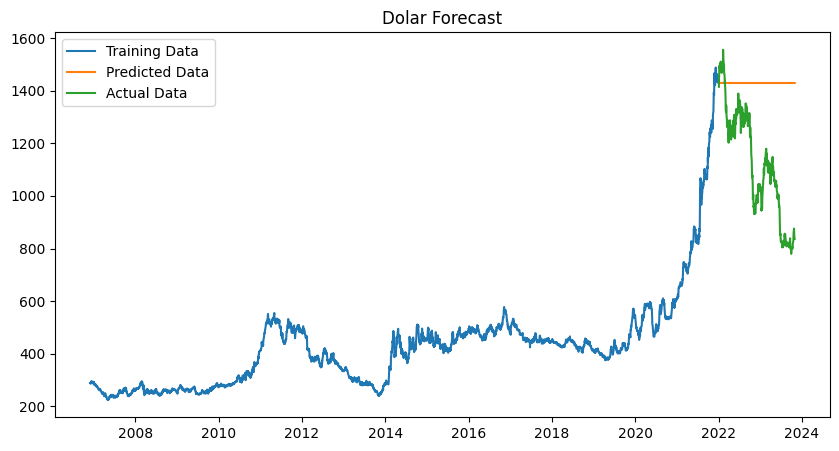

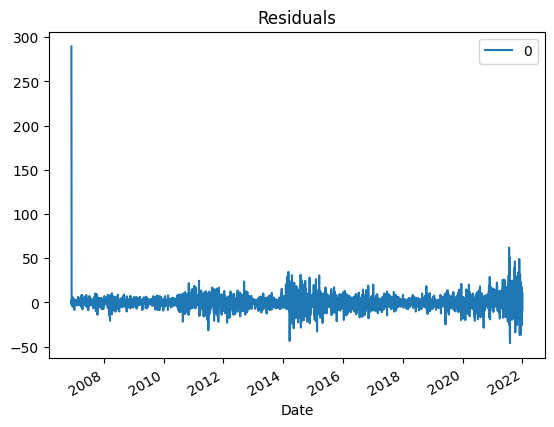

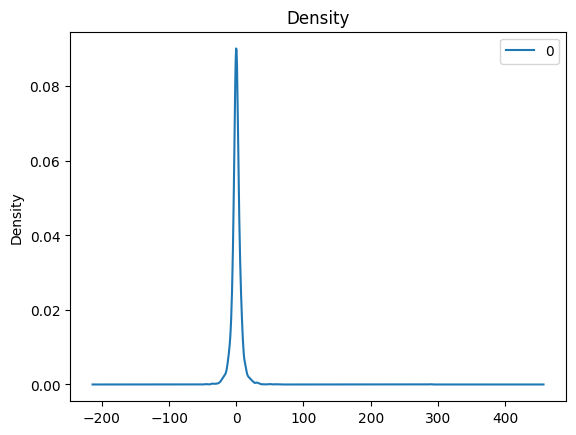

                 0
count  3758.000000
mean      0.317886
std       8.390421
min     -46.129713
25%      -2.640215
50%       0.104044
75%       3.073289
max     289.460000


In [5]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Carregar os dados
dolar_data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/Bases/clima.csv')
dolar_data['Date'] = pd.to_datetime(dolar_data['Date'])
dolar_data.set_index('Date', inplace=True)

# Teste de Estacionaridade (Augmented Dickey-Fuller Test)
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# Teste de estacionariedade no preço real
print(test_stationarity(dolar_data['Preco_Real']))

# Determinar a necessidade de diferenciação
kpss_diffs = ndiffs(dolar_data['Preco_Real'], alpha=0.05, test='kpss', max_d=3)
adf_diffs = ndiffs(dolar_data['Preco_Real'], alpha=0.05, test='adf', max_d=3)
n_diffs = max(adf_diffs, kpss_diffs)
print(f"Número recomendado de diferenciação: {n_diffs}")

# Dividir os dados em treino e teste
train_data = dolar_data['Preco_Real'].loc[dolar_data.index < '2022-01-01']
test_data = dolar_data['Preco_Real'].loc[dolar_data.index >= '2022-01-01']

# Seleção automática de parâmetros SARIMA
auto_model = auto_arima(train_data, d=n_diffs, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Treinamento do modelo SARIMA
model = SARIMAX(train_data, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
model_fit = model.fit(disp=0)

# Previsões
forecast = model_fit.forecast(steps=len(test_data))

# Visualização das previsões
plt.figure(figsize=(10,5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, forecast, label='Predicted Data')
plt.plot(test_data, label='Actual Data')
plt.legend(loc='best')
plt.title('Dolar Forecast')
plt.show()

# Análise de Resíduos
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()

residuals.plot(kind='kde', title='Density')
plt.show()

print(residuals.describe())


Test Statistic                   -0.902412
p-value                           0.787177
#Lags Used                        4.000000
Number of Observations Used    4211.000000
dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-21081.333, Time=4.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-21080.871, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-21080.079, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-21079.948, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-21079.692, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-21083.087, Time=0.78 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-21084.802, Time=0.23 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-21083.106, Time=1.58 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-21086.938, Time=0.57 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-21085.260, Time=1.58 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-21085.244, Time=1.81 sec
 ARIMA(1,1,

c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

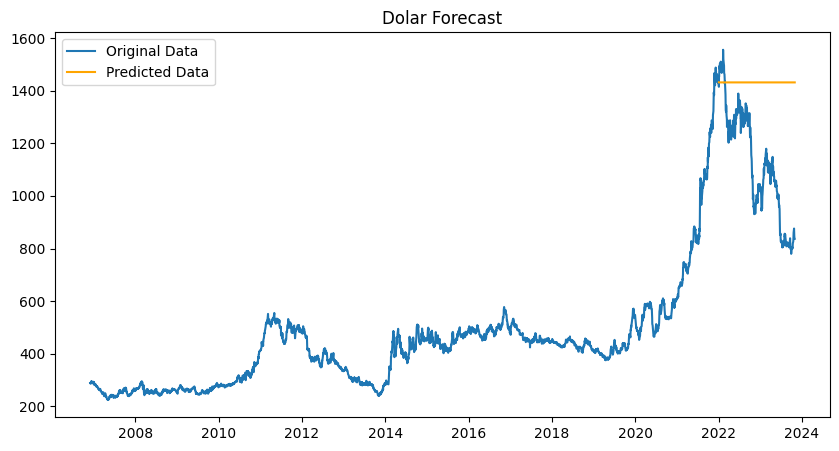

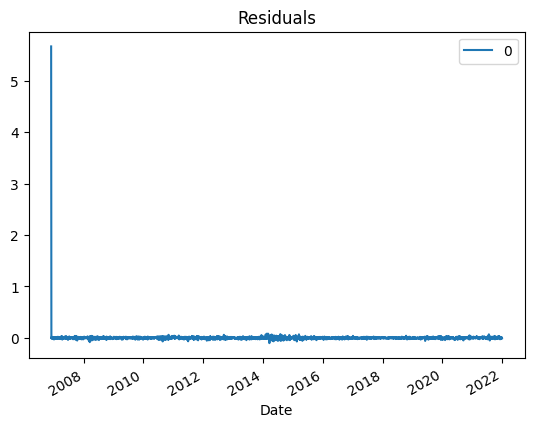

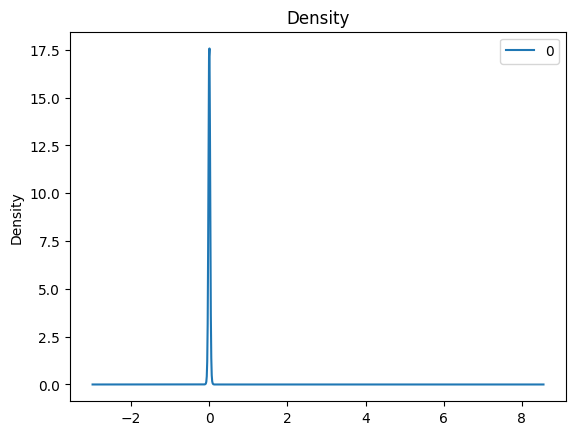

                 0
count  3758.000000
mean      0.001906
std       0.093598
min      -0.101592
25%      -0.006837
50%       0.000343
75%       0.007747
max       5.668017


In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Carregar os dados
dolar_data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/Bases/base_completa.csv')
dolar_data['Date'] = pd.to_datetime(dolar_data['Date'])
dolar_data.set_index('Date', inplace=True)

# Transformação de Log (opcional)
dolar_data['Preco_Real_Log'] = np.log(dolar_data['Preco_Real'])

# Teste de estacionariedade
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

stationarity_test = test_stationarity(dolar_data['Preco_Real_Log'].dropna())
print(stationarity_test)

# Dividir os dados em treino e teste
train_data = dolar_data['Preco_Real_Log'].loc[dolar_data.index < '2022-01-01']
test_data = dolar_data['Preco_Real_Log'].loc[dolar_data.index >= '2022-01-01']

# Seleção automática de parâmetros SARIMA
auto_model = auto_arima(train_data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Treinamento do modelo SARIMA
model = SARIMAX(train_data, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
model_fit = model.fit(disp=0)

# Previsões
forecast = model_fit.forecast(steps=len(test_data))

# Reverter a transformação de log
forecast = np.exp(forecast)

# Visualização das previsões
plt.figure(figsize=(10,5))
plt.plot(dolar_data.index, dolar_data['Preco_Real'], label='Original Data')
plt.plot(test_data.index, forecast, label='Predicted Data', color='orange')
plt.legend(loc='best')
plt.title('Dolar Forecast')
plt.show()

# Análise dos resíduos
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()
residuals.plot(kind='kde', title='Density')
plt.show()
print(residuals.describe())


In [11]:
import h2o
from h2o.estimators import H2OXGBoostEstimator

h2o.init()

# Substitua esta URL pelo caminho do seu arquivo CSV
url_do_seu_arquivo = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/clima.csv'

# Importe seu dataset para o H2O:
seu_dataset = h2o.import_file(url_do_seu_arquivo)

# Defina as variáveis preditoras e a variável resposta (substitua pelos nomes reais das colunas)
predictors = ['Data']  # coloque aqui as colunas que são características
response = 'Preco_Real'  # substitua pelo nome da coluna que é o preço a ser previsto

# Divida o dataset em conjunto de treino e validação:
train, valid = seu_dataset.split_frame(ratios=[.8], seed=1234)

# Construa e treine o modelo:
modelo_xgb = H2OXGBoostEstimator(booster='dart',
                                 normalize_type="tree",
                                 seed=1234)
modelo_xgb.train(x=predictors,
                 y=response,
                 training_frame=train,
                 validation_frame=valid)

# Avalie o desempenho do modelo:
performance = modelo_xgb.model_performance()

# Gere previsões em um conjunto de teste (se necessário):
predicoes = modelo_xgb.predict(valid)

# Visualize o desempenho
print(performance)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 mins 53 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_milen_tx7txw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.861 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


H2OValueError: Column Data not in the training frame

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from your CSV file
dolar_file_path = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/selic.csv'
dolar_data = pd.read_csv(dolar_file_path)

# Convert the 'Date' column to datetime type
dolar_data['Date'] = pd.to_datetime(dolar_data['Date'])

# Configuring the test period to start from 2022
start_test_date = pd.to_datetime('2022-01-01')
end_test_date = pd.to_datetime('2032-08-01')

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# List to store metrics and predictions for each 30-day test window
metrics = []
predictions_df = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])

# Train the model up until the start of the first test window
train_data = dolar_data[dolar_data['Date'] < start_test_date]
X_train = train_data.drop(['Preco_Real', 'Date'], axis=1)
y_train = train_data['Preco_Real']
rf_regressor.fit(X_train, y_train)

# Sliding window: Test the model in each 30-day window from start_test_date to end_test_date
for current_date in pd.date_range(start=start_test_date, end=end_test_date, freq='1D'):
    test_start = current_date
    test_end = current_date + pd.Timedelta(days=1)
    
    # Verifica se a data de término não excede o fim do conjunto de dados
    if test_end > dolar_data['Date'].max():
        test_end = dolar_data['Date'].max()
    
    # Dados de teste para a janela atual
    test_window = dolar_data[(dolar_data['Date'] >= test_start) & (dolar_data['Date'] < test_end)]
    
    # Se não houver dados para a janela atual, pula para a próxima janela
    if test_window.empty:
        continue
    
    X_test = test_window.drop(['Preco_Real', 'Date'], axis=1)
    y_test = test_window['Preco_Real']
    
    # Reinicia e treina o modelo apenas com os dados anteriores à janela de teste atual
    rf_regressor = RandomForestRegressor(random_state=42)
    train_window = dolar_data[dolar_data['Date'] < test_start]
    X_train = train_window.drop(['Preco_Real', 'Date'], axis=1)
    y_train = train_window['Preco_Real']
    
    rf_regressor.fit(X_train, y_train)

    # Faz as previsões e calcula as métricas
    y_pred = rf_regressor.predict(X_test)
    predictions_df = predictions_df.append(pd.DataFrame({
        'Date': test_window['Date'],
        'Actual': y_test,
        'Predicted': y_pred
    }), ignore_index=True)
    
    
    # Calculate and store metrics for this window
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append((test_start, mse, rmse, mae, r2))
    
    # Update the current date to the end of the test window
    current_date = test_end

# Convert the metrics to a DataFrame for easier viewing and analysis
metrics_df = pd.DataFrame(metrics, columns=['Start Date', 'MSE', 'RMSE', 'MAE', 'R2'])

# Filter the DataFrame for the desired prediction period
desired_prediction_period = predictions_df[
    (predictions_df['Date'] >= pd.to_datetime('2023-07-01')) &
    (predictions_df['Date'] <= pd.to_datetime('2023-07-09'))
]

# Print the desired prediction period
print(desired_prediction_period)
print(metrics_df)


C:\Users\milen\AppData\Local\Temp\ipykernel_11040\1571788837.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\milen\AppData\Local\Temp\ipykernel_11040\1571788837.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\milen

          Date  Actual  Predicted
374 2023-07-03  824.48  1082.7361
375 2023-07-04  824.70   973.5556
376 2023-07-05  822.25   911.8300
377 2023-07-06  829.41  1036.7316
378 2023-07-07  829.19   854.7334
    Start Date          MSE     RMSE      MAE  R2
0   2022-01-03   145.159123  12.0482  12.0482 NaN
1   2022-01-04  4940.909031  70.2916  70.2916 NaN
2   2022-01-05   390.295585  19.7559  19.7559 NaN
3   2022-01-06  1046.069649  32.3430  32.3430 NaN
4   2022-01-07  9763.692770  98.8114  98.8114 NaN
..         ...          ...      ...      ...  ..
452 2023-10-23  1874.102023  43.2909  43.2909 NaN
453 2023-10-24   267.306150  16.3495  16.3495 NaN
454 2023-10-25   484.158413  22.0036  22.0036 NaN
455 2023-10-26   130.078587  11.4052  11.4052 NaN
456 2023-10-27  1923.252254  43.8549  43.8549 NaN

[457 rows x 5 columns]


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
dolar_file_path = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/selic.csv'
dolar_data = pd.read_csv(dolar_file_path)

# Convert 'Date' to datetime
dolar_data['Date'] = pd.to_datetime(dolar_data['Date'])

# Calculate the day-to-day point difference
dolar_data['Point_Diff'] = dolar_data['Preco_Real'].diff()

# Drop the first row as it will have a NaN value for 'Point_Diff'
dolar_data = dolar_data.dropna()

# Configuration for test period
start_test_date = pd.to_datetime('2022-01-01')
end_test_date = pd.to_datetime('2032-08-01')

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Lists for metrics and predictions
metrics = []
predictions_df = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])

# Train the model up to the first test window
train_data = dolar_data[dolar_data['Date'] < start_test_date]
X_train = train_data.drop(['Preco_Real', 'Point_Diff', 'Date'], axis=1)
y_train = train_data['Point_Diff']
rf_regressor.fit(X_train, y_train)

# Test the model in each 30-day window
for current_date in pd.date_range(start=start_test_date, end=end_test_date, freq='1D'):
    test_start = current_date
    test_end = current_date + pd.Timedelta(days=1)

    if test_end > dolar_data['Date'].max():
        test_end = dolar_data['Date'].max()

    test_window = dolar_data[(dolar_data['Date'] >= test_start) & (dolar_data['Date'] < test_end)]
    
    if test_window.empty:
        continue

    X_test = test_window.drop(['Preco_Real', 'Point_Diff', 'Date'], axis=1)
    y_test = test_window['Point_Diff']
    
    # Re-train the model with data before current test window
    rf_regressor = RandomForestRegressor(random_state=42)
    train_window = dolar_data[dolar_data['Date'] < test_start]
    X_train = train_window.drop(['Preco_Real', 'Point_Diff', 'Date'], axis=1)
    y_train = train_window['Point_Diff']
    
    rf_regressor.fit(X_train, y_train)

    # Make predictions and calculate metrics
    y_pred = rf_regressor.predict(X_test)
    predictions_df = predictions_df.append(pd.DataFrame({
        'Date': test_window['Date'],
        'Actual': y_test,
        'Predicted': y_pred
    }), ignore_index=True)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append((test_start, mse, rmse, mae, r2))

    current_date = test_end

metrics_df = pd.DataFrame(metrics, columns=['Start Date', 'MSE', 'RMSE', 'MAE', 'R2'])

desired_prediction_period = predictions_df[
    (predictions_df['Date'] >= pd.to_datetime('2023-07-01')) &
    (predictions_df['Date'] <= pd.to_datetime('2023-07-09'))
]

print(desired_prediction_period)
print(metrics_df)


C:\Users\milen\AppData\Local\Temp\ipykernel_13260\1290796503.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\milen\AppData\Local\Temp\ipykernel_13260\1290796503.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\milen

          Date  Actual  Predicted
374 2023-07-03   -1.11   -11.3875
375 2023-07-04    0.22    -5.6660
376 2023-07-05   -2.45     2.1727
377 2023-07-06    7.16    -5.9962
378 2023-07-07   -0.22    -2.6389
    Start Date          MSE     RMSE      MAE  R2
0   2022-01-03   119.178706  10.9169  10.9169 NaN
1   2022-01-04  2535.495104  50.3537  50.3537 NaN
2   2022-01-05    31.633875   5.6244   5.6244 NaN
3   2022-01-06   350.947769  18.7336  18.7336 NaN
4   2022-01-07   529.266834  23.0058  23.0058 NaN
..         ...          ...      ...      ...  ..
452 2023-10-23    30.243400   5.4994   5.4994 NaN
453 2023-10-24    47.119987   6.8644   6.8644 NaN
454 2023-10-25   436.580130  20.8945  20.8945 NaN
455 2023-10-26   231.535786  15.2163  15.2163 NaN
456 2023-10-27     2.296437   1.5154   1.5154 NaN

[457 rows x 5 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from your CSV file
dolar_file_path = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/ibovespa.csv'
dolar_data = pd.read_csv(dolar_file_path)

# Convert the 'Date' column to datetime type
dolar_data['Date'] = pd.to_datetime(dolar_data['Date'])

# Configuring the test period to start from 2022
start_test_date = pd.to_datetime('2022-01-01')
end_test_date = pd.to_datetime('2032-08-01')

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# List to store metrics and predictions for each 30-day test window
metrics = []
predictions_df = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])

# Train the model up until the start of the first test window
train_data = dolar_data[dolar_data['Date'] < start_test_date]
X_train = train_data.drop(['Preco_Real', 'Date'], axis=1)
y_train = train_data['Preco_Real']
rf_regressor.fit(X_train, y_train)

# Sliding window: Test the model in each 30-day window from start_test_date to end_test_date
for current_date in pd.date_range(start=start_test_date, end=end_test_date, freq='1D'):
    test_start = current_date
    test_end = current_date + pd.Timedelta(days=1)
    
    # Verifica se a data de término não excede o fim do conjunto de dados
    if test_end > dolar_data['Date'].max():
        test_end = dolar_data['Date'].max()
    
    # Dados de teste para a janela atual
    test_window = dolar_data[(dolar_data['Date'] >= test_start) & (dolar_data['Date'] < test_end)]
    
    # Se não houver dados para a janela atual, pula para a próxima janela
    if test_window.empty:
        continue
    
    X_test = test_window.drop(['Preco_Real', 'Date'], axis=1)
    y_test = test_window['Preco_Real']
    
    # Reinicia e treina o modelo apenas com os dados anteriores à janela de teste atual
    rf_regressor = RandomForestRegressor(random_state=42)
    train_window = dolar_data[dolar_data['Date'] < test_start]
    X_train = train_window.drop(['Preco_Real', 'Date'], axis=1)
    y_train = train_window['Preco_Real']
    
    rf_regressor.fit(X_train, y_train)

    # Faz as previsões e calcula as métricas
    y_pred = rf_regressor.predict(X_test)
    predictions_df = predictions_df.append(pd.DataFrame({
        'Date': test_window['Date'],
        'Actual': y_test,
        'Predicted': y_pred
    }), ignore_index=True)
    
    
    # Calculate and store metrics for this window
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append((test_start, mse, rmse, mae, r2))
    
    # Update the current date to the end of the test window
    current_date = test_end

# Convert the metrics to a DataFrame for easier viewing and analysis
metrics_df = pd.DataFrame(metrics, columns=['Start Date', 'MSE', 'RMSE', 'MAE', 'R2'])

# Filter the DataFrame for the desired prediction period
desired_prediction_period = predictions_df[
    (predictions_df['Date'] >= pd.to_datetime('2023-07-01')) &
    (predictions_df['Date'] <= pd.to_datetime('2023-07-09'))
]

# Print the desired prediction period
print(desired_prediction_period)
print(metrics_df)


In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from your CSV file
dolar_file_path = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/clima.csv'
dolar_data = pd.read_csv(dolar_file_path)

# Convert the 'Date' column to datetime type
dolar_data['Date'] = pd.to_datetime(dolar_data['Date'])

# Configuring the test period to start from 2022
start_test_date = pd.to_datetime('2022-01-01')
end_test_date = pd.to_datetime('2032-08-01')

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# List to store metrics and predictions for each 30-day test window
metrics = []
predictions_df = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])

# Train the model up until the start of the first test window
train_data = dolar_data[dolar_data['Date'] < start_test_date]
X_train = train_data.drop(['Preco_Real', 'Date'], axis=1)
y_train = train_data['Preco_Real']
rf_regressor.fit(X_train, y_train)

# Sliding window: Test the model in each 30-day window from start_test_date to end_test_date
for current_date in pd.date_range(start=start_test_date, end=end_test_date, freq='1D'):
    test_start = current_date
    test_end = current_date + pd.Timedelta(days=1)
    
    # Verifica se a data de término não excede o fim do conjunto de dados
    if test_end > dolar_data['Date'].max():
        test_end = dolar_data['Date'].max()
    
    # Dados de teste para a janela atual
    test_window = dolar_data[(dolar_data['Date'] >= test_start) & (dolar_data['Date'] < test_end)]
    
    # Se não houver dados para a janela atual, pula para a próxima janela
    if test_window.empty:
        continue
    
    X_test = test_window.drop(['Preco_Real', 'Date'], axis=1)
    y_test = test_window['Preco_Real']
    
    # Reinicia e treina o modelo apenas com os dados anteriores à janela de teste atual
    rf_regressor = RandomForestRegressor(random_state=42)
    train_window = dolar_data[dolar_data['Date'] < test_start]
    X_train = train_window.drop(['Preco_Real', 'Date'], axis=1)
    y_train = train_window['Preco_Real']
    
    rf_regressor.fit(X_train, y_train)

    # Faz as previsões e calcula as métricas
    y_pred = rf_regressor.predict(X_test)
    predictions_df = predictions_df.append(pd.DataFrame({
        'Date': test_window['Date'],
        'Actual': y_test,
        'Predicted': y_pred
    }), ignore_index=True)
    
    
    # Calculate and store metrics for this window
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append((test_start, mse, rmse, mae, r2))
    
    # Update the current date to the end of the test window
    current_date = test_end

# Convert the metrics to a DataFrame for easier viewing and analysis
metrics_df = pd.DataFrame(metrics, columns=['Start Date', 'MSE', 'RMSE', 'MAE', 'R2'])

# Filter the DataFrame for the desired prediction period
desired_prediction_period = predictions_df[
    (predictions_df['Date'] >= pd.to_datetime('2023-07-01')) &
    (predictions_df['Date'] <= pd.to_datetime('2023-07-09'))
]

# Print the desired prediction period
print(desired_prediction_period)
print(metrics_df)


C:\Users\milen\AppData\Local\Temp\ipykernel_15860\3940362472.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\milen\AppData\Local\Temp\ipykernel_15860\3940362472.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\milen

KeyboardInterrupt: 

1 dia

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from your CSV file
dolar_file_path = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/clima.csv'
dolar_data = pd.read_csv(dolar_file_path)

# Convert the 'Date' column to datetime type
dolar_data['Date'] = pd.to_datetime(dolar_data['Date'])

# Configuring the test period to start from 2022
start_test_date = pd.to_datetime('2022-01-01')
end_test_date = pd.to_datetime('2032-08-01')

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# List to store metrics and predictions for each 30-day test window
metrics = []
predictions_df = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])

# Train the model up until the start of the first test window
train_data = dolar_data[dolar_data['Date'] < start_test_date]
X_train = train_data.drop(['Preco_Real', 'Date'], axis=1)
y_train = train_data['Preco_Real']
rf_regressor.fit(X_train, y_train)

# Sliding window: Test the model in each 30-day window from start_test_date to end_test_date
for current_date in pd.date_range(start=start_test_date, end=end_test_date, freq='1D'):
    test_start = current_date
    test_end = current_date + pd.Timedelta(days=1)
    
    # Verifica se a data de término não excede o fim do conjunto de dados
    if test_end > dolar_data['Date'].max():
        test_end = dolar_data['Date'].max()
    
    # Dados de teste para a janela atual
    test_window = dolar_data[(dolar_data['Date'] >= test_start) & (dolar_data['Date'] < test_end)]
    
    # Se não houver dados para a janela atual, pula para a próxima janela
    if test_window.empty:
        continue
    
    X_test = test_window.drop(['Preco_Real', 'Date'], axis=1)
    y_test = test_window['Preco_Real']
    
    # Reinicia e treina o modelo apenas com os dados anteriores à janela de teste atual
    rf_regressor = RandomForestRegressor(random_state=42)
    train_window = dolar_data[dolar_data['Date'] < test_start]
    X_train = train_window.drop(['Preco_Real', 'Date'], axis=1)
    y_train = train_window['Preco_Real']
    
    rf_regressor.fit(X_train, y_train)

    # Faz as previsões e calcula as métricas
    y_pred = rf_regressor.predict(X_test)
    predictions_df = predictions_df.append(pd.DataFrame({
        'Date': test_window['Date'],
        'Actual': y_test,
        'Predicted': y_pred
    }), ignore_index=True)
    
    
    # Calculate and store metrics for this window
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append((test_start, mse, rmse, mae, r2))
    
    # Update the current date to the end of the test window
    current_date = test_end

# Convert the metrics to a DataFrame for easier viewing and analysis
metrics_df = pd.DataFrame(metrics, columns=['Start Date', 'MSE', 'RMSE', 'MAE', 'R2'])

# Filter the DataFrame for the desired prediction period
desired_prediction_date = predictions_df[
    (predictions_df['Date'] == '2023-07-06') 
]

# Print the desired prediction period
print(desired_prediction_date)
print(metrics_df)


C:\Users\milen\AppData\Local\Temp\ipykernel_15860\1751725717.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\milen\AppData\Local\Temp\ipykernel_15860\1751725717.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\milen